### Replicate Figure 5 from Deep Double Descent

Tasks
*  Train 3 Layer CNNs of widths 4, 8, 12, 16, ..., 32, 46, ..., 128, 192, 256 with 500K Steps of SGD on CIFAR-10 without data-augmentation, and with 10% added label noise.
*  Train 5 Layer CNNs of widths 4, 8, 12, 16, ..., 32, 46, 64 with 500K Steps of SGD on CIFAR-10 without data-augmentation, and with 10% added label noise.
*  Train 3 Layer CNNs of widths 2, 4, 6, ..., 14, 16 with 500K Steps of SGD on CIFAR-10 without data-augmentation, and with 10% added label noise.

Future Tasks:
*  Redo parts of the above using the lazy and active regime.

Notes:
* Depth 3 conv net with width 256 has approx 1.2 million parameters. 
* Depth 5 conv net with width 64 has approx 1.5 million parameters.
* depth 7 conv net with width 16 has approx 1.5 million parameters.

Interpolation is reached at ~600,000 parameters.
We want to cross compare # parameters, not the width value.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

from models.conv_nets import make_convNet 
from utils.train_utils import timer, inverse_squareroot_lr

# keeps tensorflow from using all available GPU memory when a model is initialized.
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

#### Train depth 3 conv nets at depths of [1, 2, 4, 8, ..., 32, 48, 64, 80, ... ,128, 192,  256]

In [7]:
batch_size=128
n_epochs = 500_000 // (50_000 // 128) # total number desirec SGD steps / number batches per epoch
label_noise = 0.10

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# apply label noise to the data set
random_idx = np.random.choice(x_train.shape[0], int(label_noise*x_train.shape[0]))
rand_labels = np.random.randint(low=y_train.min(), high=y_train.max(), size=len(random_idx))
y_train[random_idx] = np.expand_dims(rand_labels, axis=1)

image_shape = x_train[0].shape

model_histories = {}
convnet_widths = [1, 2] + [4 * (i+1) for i in range(7)] + [32 + 16*(i) for i in range(7)] + [192, 256]
convnet_depth = 3

# Paths to save model weights and 
model_weights_paths = f'trained_model_weights/conv_nets_depth_{convnet_depth}/'
data_save_path = 'experimental_results/conv_nets_'

for width in convnet_widths:
    # Depth 3 Conv Net using default Kaiming Uniform Initialization.
    conv_net, model_id = make_convNet(image_shape, depth=convnet_depth, init_channels=width)

    conv_net.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=inverse_squareroot_lr()),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    model_timer = timer()
    
    print(f'STARTING TRAINING: {model_id}')
    history = conv_net.fit(
        x=x_train, y=y_train, 
        validation_data=(x_test, y_test),
        epochs=n_epochs,
        batch_size=batch_size,
        verbose=0, 
        callbacks = [model_timer]
    )
    print(f'FINISHED TRAINING: {model_id}')
    
    # add results to dictionary and store the resulting model weights.
    model_histories[model_id] = history
    history.model.save_weights(model_weight_paths+m_id)
    
    # clear GPU of prior model to decrease training times.
    tf.keras.backend.clear_session()
    
    
# store all the results in a pickle file for later graphing and analysis.
depth_3_metrics = {} 

for m_id, history in model_histories.items():
    depth_3_metrics[m_id] = history.history
    
pkl.dump(depth_3_metrics, open(data_save_path + f'depth_{convnet_depth}.pkl', 'wb'))

STARTING TRAINING: conv_net_depth_3_width_1
Epoch: 0000, Total Run Time: 00:00:03 - Loss: 2.1890e+00, Accuracy: 0.196, Test Loss: 2.0076e+00, Test Accuracy: 0.269
Epoch: 0025, Total Run Time: 00:00:56 - Loss: 1.8083e+00, Accuracy: 0.374, Test Loss: 1.7426e+00, Test Accuracy: 0.370
Epoch: 0050, Total Run Time: 00:01:50 - Loss: 1.8026e+00, Accuracy: 0.375, Test Loss: 1.7060e+00, Test Accuracy: 0.393
Epoch: 0075, Total Run Time: 00:02:43 - Loss: 1.8002e+00, Accuracy: 0.376, Test Loss: 1.7422e+00, Test Accuracy: 0.373
Epoch: 0100, Total Run Time: 00:03:36 - Loss: 1.8011e+00, Accuracy: 0.376, Test Loss: 1.6889e+00, Test Accuracy: 0.396
Epoch: 0125, Total Run Time: 00:04:29 - Loss: 1.7990e+00, Accuracy: 0.376, Test Loss: 1.6910e+00, Test Accuracy: 0.400
Epoch: 0150, Total Run Time: 00:05:23 - Loss: 1.7975e+00, Accuracy: 0.380, Test Loss: 1.6901e+00, Test Accuracy: 0.402
Epoch: 0175, Total Run Time: 00:06:16 - Loss: 1.8001e+00, Accuracy: 0.375, Test Loss: 1.6932e+00, Test Accuracy: 0.398
Epoc

Epoch: 0400, Total Run Time: 00:13:59 - Loss: 1.5910e+00, Accuracy: 0.471, Test Loss: 1.4083e+00, Test Accuracy: 0.512
Epoch: 0425, Total Run Time: 00:14:51 - Loss: 1.5907e+00, Accuracy: 0.472, Test Loss: 1.4210e+00, Test Accuracy: 0.501
Epoch: 0450, Total Run Time: 00:15:43 - Loss: 1.5853e+00, Accuracy: 0.473, Test Loss: 1.4360e+00, Test Accuracy: 0.491
Epoch: 0475, Total Run Time: 00:16:36 - Loss: 1.5874e+00, Accuracy: 0.471, Test Loss: 1.4231e+00, Test Accuracy: 0.502
Epoch: 0500, Total Run Time: 00:17:28 - Loss: 1.5853e+00, Accuracy: 0.472, Test Loss: 1.4663e+00, Test Accuracy: 0.479
Epoch: 0525, Total Run Time: 00:18:20 - Loss: 1.5862e+00, Accuracy: 0.473, Test Loss: 1.4237e+00, Test Accuracy: 0.502
Epoch: 0550, Total Run Time: 00:19:12 - Loss: 1.5846e+00, Accuracy: 0.474, Test Loss: 1.4298e+00, Test Accuracy: 0.494
Epoch: 0575, Total Run Time: 00:20:04 - Loss: 1.5849e+00, Accuracy: 0.472, Test Loss: 1.4115e+00, Test Accuracy: 0.508
Epoch: 0600, Total Run Time: 00:20:57 - Loss: 1.

Epoch: 0825, Total Run Time: 00:26:47 - Loss: 1.3542e+00, Accuracy: 0.573, Test Loss: 1.1631e+00, Test Accuracy: 0.604
Epoch: 0850, Total Run Time: 00:27:32 - Loss: 1.3535e+00, Accuracy: 0.572, Test Loss: 1.1894e+00, Test Accuracy: 0.588
Epoch: 0875, Total Run Time: 00:28:16 - Loss: 1.3554e+00, Accuracy: 0.572, Test Loss: 1.2068e+00, Test Accuracy: 0.590
Epoch: 0900, Total Run Time: 00:29:00 - Loss: 1.3545e+00, Accuracy: 0.571, Test Loss: 1.1692e+00, Test Accuracy: 0.600
Epoch: 0925, Total Run Time: 00:29:44 - Loss: 1.3544e+00, Accuracy: 0.572, Test Loss: 1.1833e+00, Test Accuracy: 0.595
Epoch: 0950, Total Run Time: 00:30:29 - Loss: 1.3535e+00, Accuracy: 0.571, Test Loss: 1.1879e+00, Test Accuracy: 0.595
Epoch: 0975, Total Run Time: 00:31:13 - Loss: 1.3545e+00, Accuracy: 0.573, Test Loss: 1.1739e+00, Test Accuracy: 0.601
Epoch: 1000, Total Run Time: 00:31:57 - Loss: 1.3544e+00, Accuracy: 0.572, Test Loss: 1.1579e+00, Test Accuracy: 0.607
Epoch: 1025, Total Run Time: 00:32:40 - Loss: 1.

Epoch: 1250, Total Run Time: 00:38:35 - Loss: 1.1831e+00, Accuracy: 0.641, Test Loss: 1.0132e+00, Test Accuracy: 0.653
Epoch: 1275, Total Run Time: 00:39:22 - Loss: 1.1808e+00, Accuracy: 0.643, Test Loss: 1.0281e+00, Test Accuracy: 0.652
FINISHED TRAINING: conv_net_depth_3_width_8
STARTING TRAINING: conv_net_depth_3_width_12
Epoch: 0000, Total Run Time: 00:00:03 - Loss: 1.9700e+00, Accuracy: 0.353, Test Loss: 1.6028e+00, Test Accuracy: 0.432
Epoch: 0025, Total Run Time: 00:00:49 - Loss: 1.2003e+00, Accuracy: 0.635, Test Loss: 1.0145e+00, Test Accuracy: 0.650
Epoch: 0050, Total Run Time: 00:01:36 - Loss: 1.1558e+00, Accuracy: 0.653, Test Loss: 1.0642e+00, Test Accuracy: 0.639
Epoch: 0075, Total Run Time: 00:02:23 - Loss: 1.1363e+00, Accuracy: 0.659, Test Loss: 1.0999e+00, Test Accuracy: 0.623
Epoch: 0100, Total Run Time: 00:03:10 - Loss: 1.1222e+00, Accuracy: 0.664, Test Loss: 1.0135e+00, Test Accuracy: 0.652
Epoch: 0125, Total Run Time: 00:03:56 - Loss: 1.1140e+00, Accuracy: 0.665, Tes

Epoch: 0350, Total Run Time: 00:11:04 - Loss: 9.7628e-01, Accuracy: 0.706, Test Loss: 1.0584e+00, Test Accuracy: 0.639
Epoch: 0375, Total Run Time: 00:11:51 - Loss: 9.7426e-01, Accuracy: 0.707, Test Loss: 1.0321e+00, Test Accuracy: 0.656
Epoch: 0400, Total Run Time: 00:12:38 - Loss: 9.7450e-01, Accuracy: 0.706, Test Loss: 1.0105e+00, Test Accuracy: 0.657
Epoch: 0425, Total Run Time: 00:13:26 - Loss: 9.6951e-01, Accuracy: 0.707, Test Loss: 1.0968e+00, Test Accuracy: 0.626
Epoch: 0450, Total Run Time: 00:14:13 - Loss: 9.6731e-01, Accuracy: 0.709, Test Loss: 9.7740e-01, Test Accuracy: 0.663
Epoch: 0475, Total Run Time: 00:15:01 - Loss: 9.6688e-01, Accuracy: 0.709, Test Loss: 1.0718e+00, Test Accuracy: 0.636
Epoch: 0500, Total Run Time: 00:15:48 - Loss: 9.6433e-01, Accuracy: 0.709, Test Loss: 1.0327e+00, Test Accuracy: 0.647
Epoch: 0525, Total Run Time: 00:16:34 - Loss: 9.6111e-01, Accuracy: 0.711, Test Loss: 1.0108e+00, Test Accuracy: 0.663
Epoch: 0550, Total Run Time: 00:17:19 - Loss: 9.

Epoch: 0775, Total Run Time: 00:23:53 - Loss: 8.5514e-01, Accuracy: 0.741, Test Loss: 1.0860e+00, Test Accuracy: 0.652
Epoch: 0800, Total Run Time: 00:24:39 - Loss: 8.5268e-01, Accuracy: 0.742, Test Loss: 1.1044e+00, Test Accuracy: 0.647
Epoch: 0825, Total Run Time: 00:25:25 - Loss: 8.5347e-01, Accuracy: 0.740, Test Loss: 1.0846e+00, Test Accuracy: 0.646
Epoch: 0850, Total Run Time: 00:26:11 - Loss: 8.5153e-01, Accuracy: 0.740, Test Loss: 1.1238e+00, Test Accuracy: 0.638
Epoch: 0875, Total Run Time: 00:26:57 - Loss: 8.5250e-01, Accuracy: 0.741, Test Loss: 1.1328e+00, Test Accuracy: 0.636
Epoch: 0900, Total Run Time: 00:27:43 - Loss: 8.4845e-01, Accuracy: 0.743, Test Loss: 1.0769e+00, Test Accuracy: 0.650
Epoch: 0925, Total Run Time: 00:28:28 - Loss: 8.5014e-01, Accuracy: 0.742, Test Loss: 1.1103e+00, Test Accuracy: 0.644
Epoch: 0950, Total Run Time: 00:29:15 - Loss: 8.4642e-01, Accuracy: 0.742, Test Loss: 1.1786e+00, Test Accuracy: 0.622
Epoch: 0975, Total Run Time: 00:30:00 - Loss: 8.

Epoch: 1200, Total Run Time: 00:38:54 - Loss: 6.9103e-01, Accuracy: 0.783, Test Loss: 1.3108e+00, Test Accuracy: 0.622
Epoch: 1225, Total Run Time: 00:39:44 - Loss: 6.8924e-01, Accuracy: 0.783, Test Loss: 1.4153e+00, Test Accuracy: 0.603
Epoch: 1250, Total Run Time: 00:40:34 - Loss: 6.8768e-01, Accuracy: 0.782, Test Loss: 1.3387e+00, Test Accuracy: 0.620
Epoch: 1275, Total Run Time: 00:41:24 - Loss: 6.8713e-01, Accuracy: 0.782, Test Loss: 1.3572e+00, Test Accuracy: 0.614
FINISHED TRAINING: conv_net_depth_3_width_24
STARTING TRAINING: conv_net_depth_3_width_28
Epoch: 0000, Total Run Time: 00:00:03 - Loss: 2.1630e+00, Accuracy: 0.359, Test Loss: 1.5593e+00, Test Accuracy: 0.444
Epoch: 0025, Total Run Time: 00:00:54 - Loss: 1.0345e+00, Accuracy: 0.695, Test Loss: 1.1164e+00, Test Accuracy: 0.625
Epoch: 0050, Total Run Time: 00:01:45 - Loss: 9.2819e-01, Accuracy: 0.728, Test Loss: 9.6101e-01, Test Accuracy: 0.678
Epoch: 0075, Total Run Time: 00:02:35 - Loss: 8.6673e-01, Accuracy: 0.741, Te

Epoch: 0300, Total Run Time: 00:10:15 - Loss: 6.1064e-01, Accuracy: 0.805, Test Loss: 1.4677e+00, Test Accuracy: 0.609
Epoch: 0325, Total Run Time: 00:11:06 - Loss: 5.9965e-01, Accuracy: 0.808, Test Loss: 1.6009e+00, Test Accuracy: 0.583
Epoch: 0350, Total Run Time: 00:11:56 - Loss: 5.8959e-01, Accuracy: 0.811, Test Loss: 1.4907e+00, Test Accuracy: 0.612
Epoch: 0375, Total Run Time: 00:12:47 - Loss: 5.7492e-01, Accuracy: 0.815, Test Loss: 1.4698e+00, Test Accuracy: 0.610
Epoch: 0400, Total Run Time: 00:13:38 - Loss: 5.6762e-01, Accuracy: 0.817, Test Loss: 1.6000e+00, Test Accuracy: 0.599
Epoch: 0425, Total Run Time: 00:14:29 - Loss: 5.6029e-01, Accuracy: 0.818, Test Loss: 1.5672e+00, Test Accuracy: 0.607
Epoch: 0450, Total Run Time: 00:15:20 - Loss: 5.4874e-01, Accuracy: 0.822, Test Loss: 1.6636e+00, Test Accuracy: 0.599
Epoch: 0475, Total Run Time: 00:16:11 - Loss: 5.3735e-01, Accuracy: 0.825, Test Loss: 1.6907e+00, Test Accuracy: 0.596
Epoch: 0500, Total Run Time: 00:17:02 - Loss: 5.

Epoch: 0725, Total Run Time: 00:32:11 - Loss: 4.1348e-02, Accuracy: 0.986, Test Loss: 5.4106e+00, Test Accuracy: 0.576
Epoch: 0750, Total Run Time: 00:33:17 - Loss: 5.1197e-02, Accuracy: 0.982, Test Loss: 5.7591e+00, Test Accuracy: 0.565
Epoch: 0775, Total Run Time: 00:34:24 - Loss: 6.6671e-02, Accuracy: 0.976, Test Loss: 5.5781e+00, Test Accuracy: 0.578
Epoch: 0800, Total Run Time: 00:35:30 - Loss: 3.2862e-02, Accuracy: 0.989, Test Loss: 5.7060e+00, Test Accuracy: 0.574
Epoch: 0825, Total Run Time: 00:36:36 - Loss: 4.7903e-02, Accuracy: 0.983, Test Loss: 5.9854e+00, Test Accuracy: 0.566
Epoch: 0850, Total Run Time: 00:37:43 - Loss: 3.6739e-02, Accuracy: 0.987, Test Loss: 5.9012e+00, Test Accuracy: 0.566
Epoch: 0875, Total Run Time: 00:38:49 - Loss: 4.5117e-02, Accuracy: 0.985, Test Loss: 6.2244e+00, Test Accuracy: 0.564
Epoch: 0900, Total Run Time: 00:39:55 - Loss: 4.0244e-02, Accuracy: 0.986, Test Loss: 5.9621e+00, Test Accuracy: 0.578
Epoch: 0925, Total Run Time: 00:41:02 - Loss: 4.

Epoch: 1150, Total Run Time: 01:16:07 - Loss: 4.3085e-04, Accuracy: 1.000, Test Loss: 4.2769e+00, Test Accuracy: 0.624
Epoch: 1175, Total Run Time: 01:17:51 - Loss: 3.9547e-04, Accuracy: 1.000, Test Loss: 4.3088e+00, Test Accuracy: 0.622
Epoch: 1200, Total Run Time: 01:19:32 - Loss: 3.5905e-04, Accuracy: 1.000, Test Loss: 4.3151e+00, Test Accuracy: 0.625
Epoch: 1225, Total Run Time: 01:21:14 - Loss: 3.4721e-04, Accuracy: 1.000, Test Loss: 4.3233e+00, Test Accuracy: 0.624
Epoch: 1250, Total Run Time: 01:22:57 - Loss: 3.3846e-04, Accuracy: 1.000, Test Loss: 4.3545e+00, Test Accuracy: 0.623
Epoch: 1275, Total Run Time: 01:24:39 - Loss: 3.5276e-04, Accuracy: 1.000, Test Loss: 4.3720e+00, Test Accuracy: 0.623
FINISHED TRAINING: conv_net_depth_3_width_64
STARTING TRAINING: conv_net_depth_3_width_80
Epoch: 0000, Total Run Time: 00:00:07 - Loss: 2.9023e+00, Accuracy: 0.359, Test Loss: 1.5226e+00, Test Accuracy: 0.455
Epoch: 0025, Total Run Time: 00:02:10 - Loss: 9.2760e-01, Accuracy: 0.732, Te

Epoch: 0250, Total Run Time: 00:26:18 - Loss: 1.0655e-03, Accuracy: 1.000, Test Loss: 2.9720e+00, Test Accuracy: 0.636
Epoch: 0275, Total Run Time: 00:29:32 - Loss: 9.2511e-04, Accuracy: 1.000, Test Loss: 3.0419e+00, Test Accuracy: 0.634
Epoch: 0300, Total Run Time: 00:32:45 - Loss: 8.4228e-04, Accuracy: 1.000, Test Loss: 3.0896e+00, Test Accuracy: 0.633
Epoch: 0325, Total Run Time: 00:35:59 - Loss: 6.8629e-04, Accuracy: 1.000, Test Loss: 3.1297e+00, Test Accuracy: 0.637
Epoch: 0350, Total Run Time: 00:39:12 - Loss: 6.1039e-04, Accuracy: 1.000, Test Loss: 3.1799e+00, Test Accuracy: 0.634
Epoch: 0375, Total Run Time: 00:42:25 - Loss: 6.1200e-04, Accuracy: 1.000, Test Loss: 3.2038e+00, Test Accuracy: 0.635
Epoch: 0400, Total Run Time: 00:45:39 - Loss: 4.7679e-04, Accuracy: 1.000, Test Loss: 3.2414e+00, Test Accuracy: 0.635
Epoch: 0425, Total Run Time: 00:48:53 - Loss: 4.5758e-04, Accuracy: 1.000, Test Loss: 3.2725e+00, Test Accuracy: 0.637
Epoch: 0450, Total Run Time: 00:52:06 - Loss: 3.

Epoch: 0675, Total Run Time: 01:38:16 - Loss: 2.3049e-04, Accuracy: 1.000, Test Loss: 3.1701e+00, Test Accuracy: 0.646
Epoch: 0700, Total Run Time: 01:42:00 - Loss: 2.1263e-04, Accuracy: 1.000, Test Loss: 3.1908e+00, Test Accuracy: 0.646
Epoch: 0725, Total Run Time: 01:45:44 - Loss: 1.9121e-04, Accuracy: 1.000, Test Loss: 3.2066e+00, Test Accuracy: 0.646
Epoch: 0750, Total Run Time: 01:49:28 - Loss: 1.8814e-04, Accuracy: 1.000, Test Loss: 3.2231e+00, Test Accuracy: 0.647
Epoch: 0775, Total Run Time: 01:53:12 - Loss: 2.0055e-04, Accuracy: 1.000, Test Loss: 3.2349e+00, Test Accuracy: 0.647
Epoch: 0800, Total Run Time: 01:56:56 - Loss: 1.6913e-04, Accuracy: 1.000, Test Loss: 3.2472e+00, Test Accuracy: 0.647
Epoch: 0825, Total Run Time: 02:00:39 - Loss: 1.6148e-04, Accuracy: 1.000, Test Loss: 3.2657e+00, Test Accuracy: 0.646
Epoch: 0850, Total Run Time: 02:04:23 - Loss: 1.6067e-04, Accuracy: 1.000, Test Loss: 3.2680e+00, Test Accuracy: 0.647
Epoch: 0875, Total Run Time: 02:08:06 - Loss: 1.

Epoch: 1100, Total Run Time: 03:06:21 - Loss: 1.0396e-04, Accuracy: 1.000, Test Loss: 3.2854e+00, Test Accuracy: 0.655
Epoch: 1125, Total Run Time: 03:10:35 - Loss: 1.0522e-04, Accuracy: 1.000, Test Loss: 3.2912e+00, Test Accuracy: 0.656
Epoch: 1150, Total Run Time: 03:14:50 - Loss: 9.2708e-05, Accuracy: 1.000, Test Loss: 3.3017e+00, Test Accuracy: 0.656
Epoch: 1175, Total Run Time: 03:19:03 - Loss: 8.9336e-05, Accuracy: 1.000, Test Loss: 3.3052e+00, Test Accuracy: 0.655
Epoch: 1200, Total Run Time: 03:23:17 - Loss: 9.2155e-05, Accuracy: 1.000, Test Loss: 3.3170e+00, Test Accuracy: 0.656
Epoch: 1225, Total Run Time: 03:27:32 - Loss: 8.2833e-05, Accuracy: 1.000, Test Loss: 3.3207e+00, Test Accuracy: 0.655
Epoch: 1250, Total Run Time: 03:31:46 - Loss: 8.6323e-05, Accuracy: 1.000, Test Loss: 3.3280e+00, Test Accuracy: 0.656
Epoch: 1275, Total Run Time: 03:36:01 - Loss: 8.7565e-05, Accuracy: 1.000, Test Loss: 3.3353e+00, Test Accuracy: 0.656
FINISHED TRAINING: conv_net_depth_3_width_128
ST

Epoch: 0200, Total Run Time: 00:57:52 - Loss: 8.7594e-04, Accuracy: 1.000, Test Loss: 2.4429e+00, Test Accuracy: 0.663
Epoch: 0225, Total Run Time: 01:05:01 - Loss: 7.1205e-04, Accuracy: 1.000, Test Loss: 2.4964e+00, Test Accuracy: 0.664
Epoch: 0250, Total Run Time: 01:12:09 - Loss: 5.6007e-04, Accuracy: 1.000, Test Loss: 2.5448e+00, Test Accuracy: 0.663
Epoch: 0275, Total Run Time: 01:19:18 - Loss: 4.9652e-04, Accuracy: 1.000, Test Loss: 2.5797e+00, Test Accuracy: 0.663
Epoch: 0300, Total Run Time: 01:26:26 - Loss: 4.3723e-04, Accuracy: 1.000, Test Loss: 2.6158e+00, Test Accuracy: 0.663
Epoch: 0325, Total Run Time: 01:33:35 - Loss: 3.6960e-04, Accuracy: 1.000, Test Loss: 2.6496e+00, Test Accuracy: 0.663
Epoch: 0350, Total Run Time: 01:40:44 - Loss: 3.2526e-04, Accuracy: 1.000, Test Loss: 2.6835e+00, Test Accuracy: 0.661
Epoch: 0375, Total Run Time: 01:47:54 - Loss: 2.9514e-04, Accuracy: 1.000, Test Loss: 2.7060e+00, Test Accuracy: 0.663
Epoch: 0400, Total Run Time: 01:55:03 - Loss: 2.

### Graph Results: Train & Test Loss and Accuracy at both end of training and at optimal early stopping.

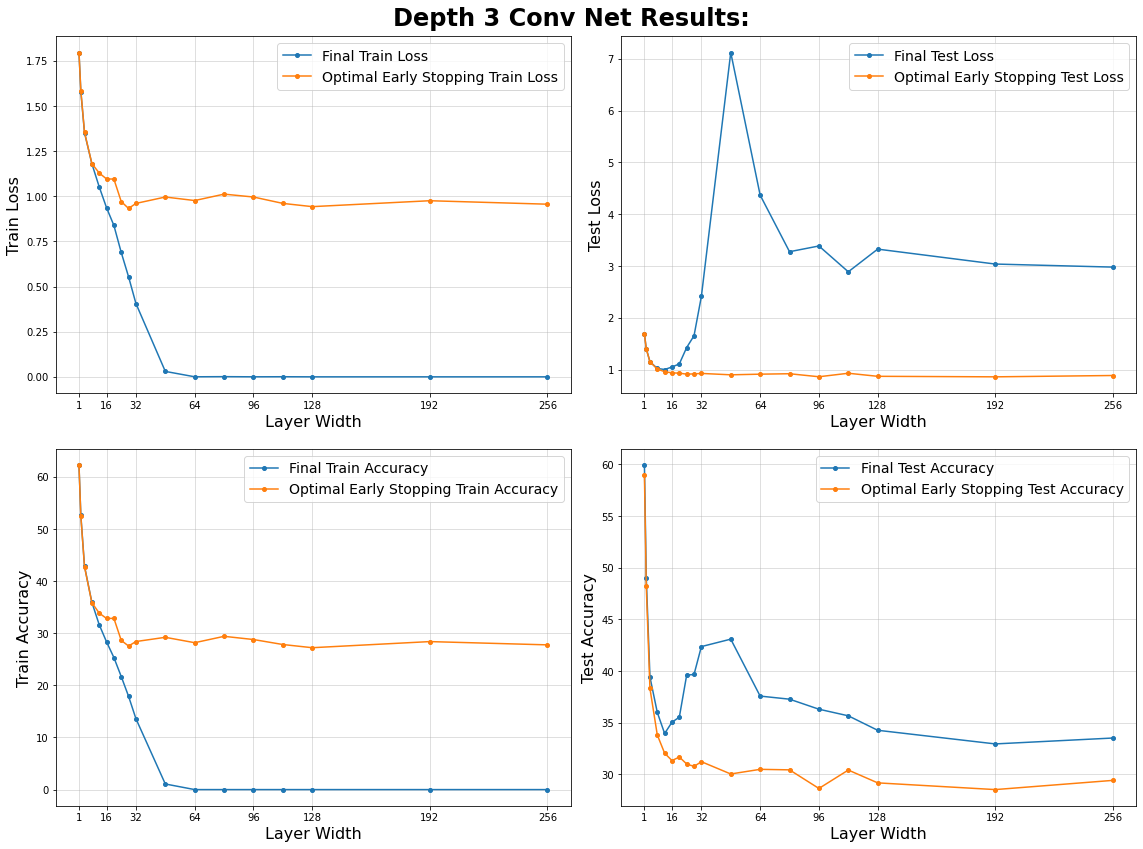

In [113]:
# Plot the train/test loss and accuracy at the end of training for each model. 
widths = []
train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []


for model_id, history in model_histories.items():
    widths.append(int(model_id[23:]))
    
    hstry = history.history
    train_losses.append(hstry.get('loss'))
    train_accuracy.append(hstry.get('accuracy'))
    test_losses.append(hstry.get('val_loss'))
    test_accuracy.append(hstry.get('val_accuracy'))    
    
train_losses = np.array(train_losses)
train_accuracy = np.array(train_accuracy)
test_losses = np.array(test_losses)
test_accuracy = np.array(test_accuracy)

# optimal early stopping values
optimal_test_idx = test_accuracy.argmax(axis=1)
optimal_early_train_losses = np.array([train_losses[i, idx] for i, idx in enumerate(optimal_test_idx)])
optimal_early_train_accuracy = np.array([train_accuracy[i, idx] for i, idx in enumerate(optimal_test_idx)])
optimal_early_test_losses = np.array([test_losses[i, idx] for i, idx in enumerate(optimal_test_idx)])
optimal_early_test_accuracy = np.array([test_accuracy[i, idx] for i, idx in enumerate(optimal_test_idx)])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

train_loss_plt = axes[0][0]
test_loss_plt = axes[0][1]
train_accy_plt = axes[1][0]
test_accy_plt = axes[1][1]

fig.suptitle('Depth 3 Conv Net Results:', fontsize=24, fontweight='bold')

train_loss_plt.plot(widths, train_losses[:,-1], marker='o', markersize=4, label='Final Train Loss')
train_loss_plt.plot(widths, optimal_early_train_losses, marker='o', markersize=4, label='Optimal Early Stopping Train Loss')
train_loss_plt.set_ylabel('Train Loss', fontsize=16)

test_loss_plt.plot(widths, test_losses[:,-1], marker='o', markersize=4, label='Final Test Loss')
test_loss_plt.plot(widths, optimal_early_test_losses, marker='o', markersize=4, label='Optimal Early Stopping Test Loss')
test_loss_plt.set_ylabel('Test Loss', fontsize=16)

train_accy_plt.plot(widths, 100*(1 - train_accuracy[:,-1]), marker='o', markersize=4, label='Final Train Accuracy')
train_accy_plt.plot(widths, 100*(1 - optimal_early_train_accuracy), marker='o', markersize=4, label='Optimal Early Stopping Train Accuracy')
train_accy_plt.set_ylabel('Train Accuracy', fontsize=16)

test_accy_plt.plot(widths, 100*(1 - test_accuracy[:,-1]), marker='o', markersize=4, label='Final Test Accuracy')
test_accy_plt.plot(widths, 100*(1 - optimal_early_test_accuracy), marker='o', markersize=4, label='Optimal Early Stopping Test Accuracy')
test_accy_plt.set_ylabel('Test Accuracy', fontsize=16)



x_ticks = [1, 16, 32, 64, 96, 128, 192, 256]

for ax in axes.flatten():
    ax.set_xlabel('Layer Width', fontsize=16)
    ax.set_xticks(x_ticks)
    ax.legend(fontsize=14)
    ax.grid(alpha=0.5)

fig.tight_layout(pad=1.15, h_pad=2)
plt.show()